In [1]:
import zipfile
import numpy as np
import pandas as pd
#Считаем файл трейна и теста в таблицу пандас
z_train = zipfile.ZipFile("../data/training.zip")
train = pd.read_csv(z_train.open("training.csv"))
print(train.shape)
train.head()

(250000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [2]:
z_test = zipfile.ZipFile("../data/test.zip")
test = pd.read_csv(z_test.open("test.csv"))
print(test.shape)
test.head()

(550000, 31)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [3]:
print(train['Label'].unique())
train['Label'] = train['Label'].map({'s':1,'b':0})
train['Label'].astype('Int32')
train['Label']

['s' 'b']


0         1
1         0
2         0
3         0
4         0
         ..
249995    0
249996    0
249997    1
249998    0
249999    0
Name: Label, Length: 250000, dtype: int64

C:\Users\Max\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


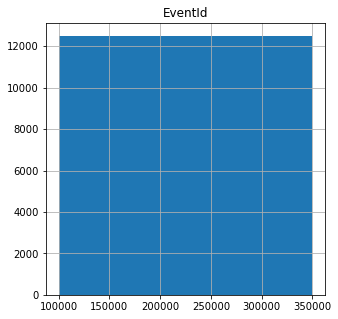

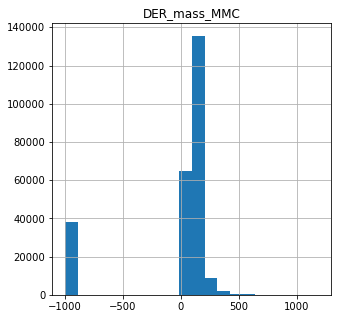

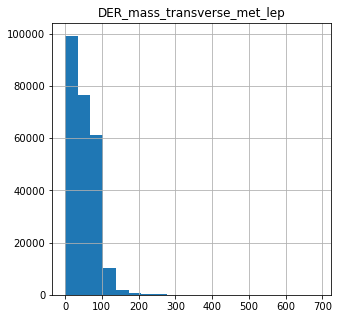

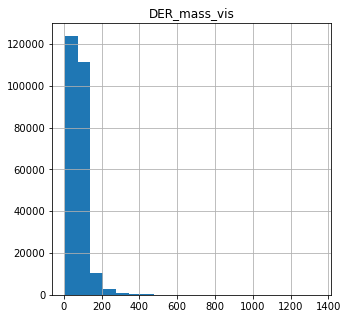

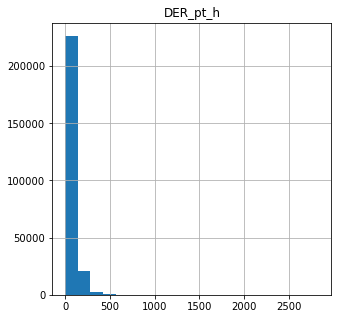

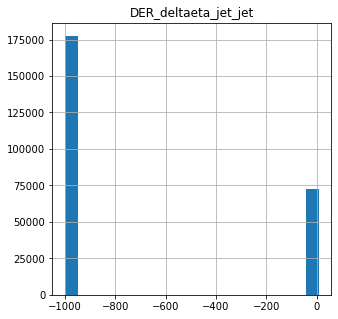

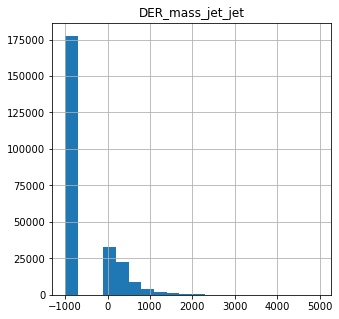

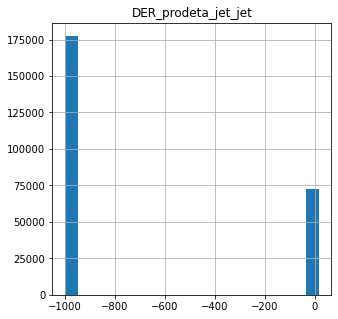

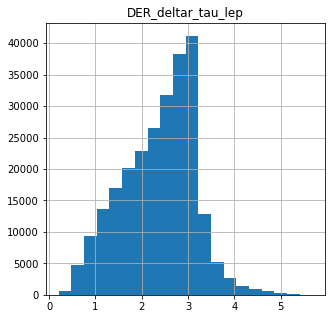

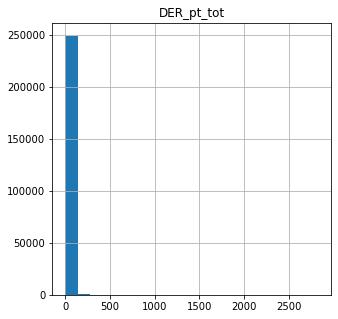

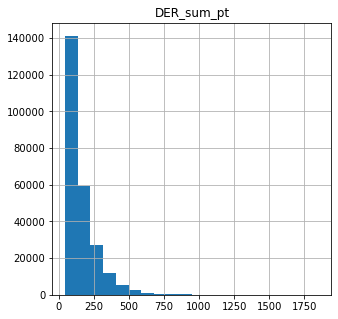

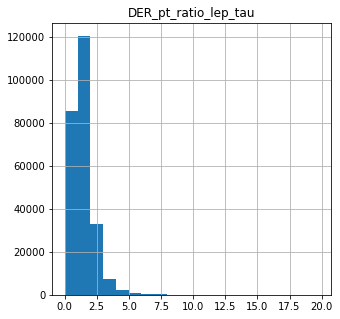

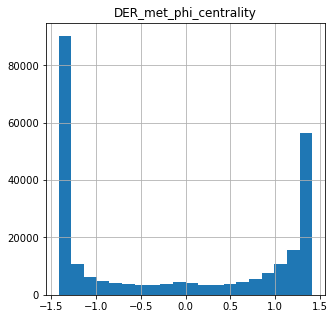

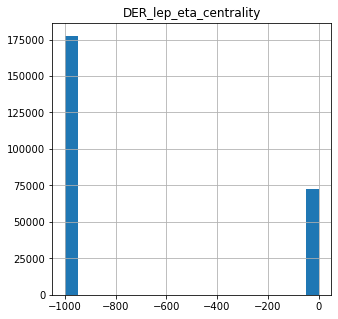

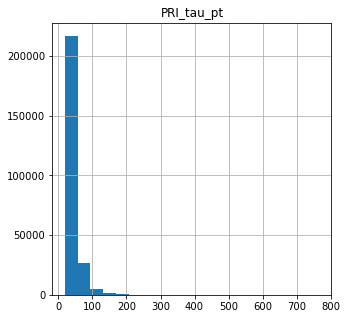

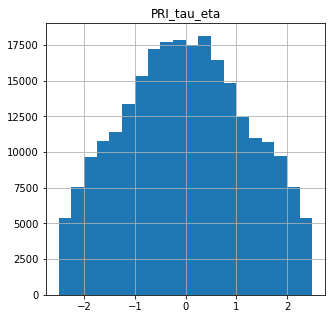

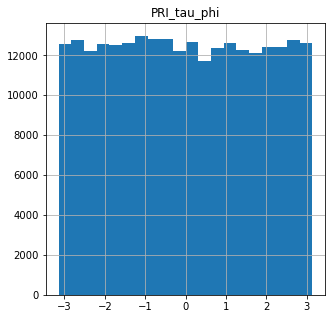

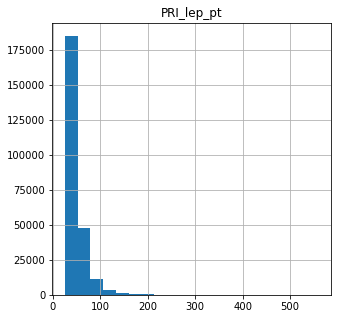

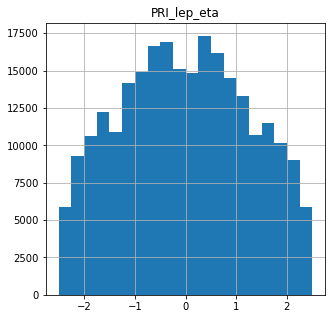

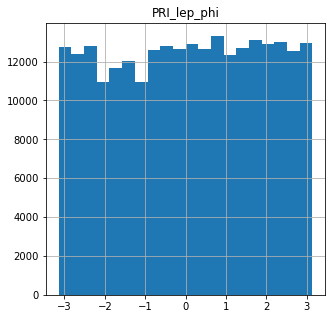

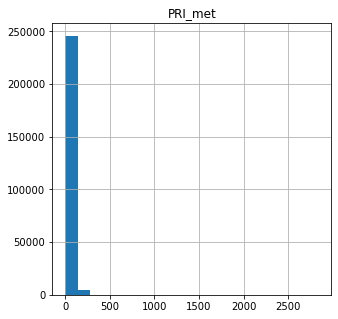

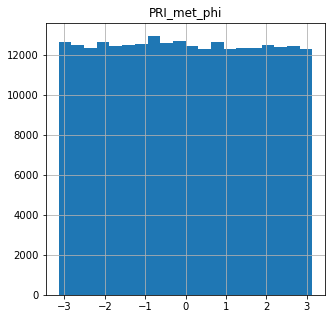

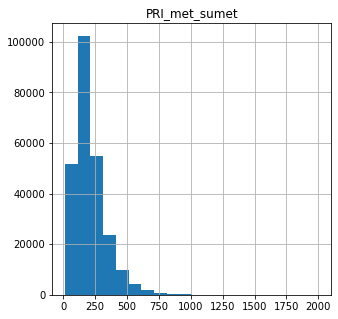

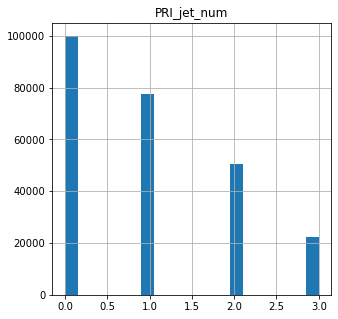

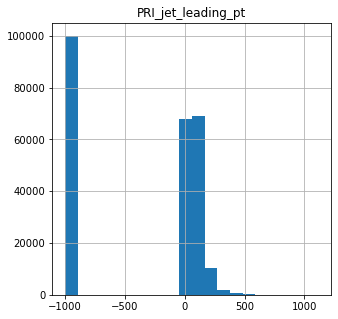

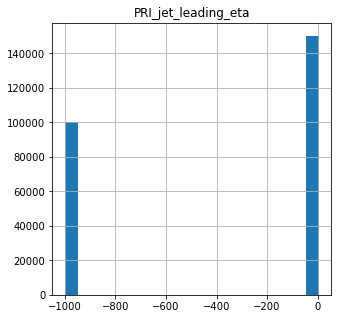

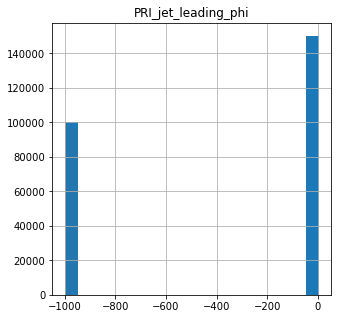

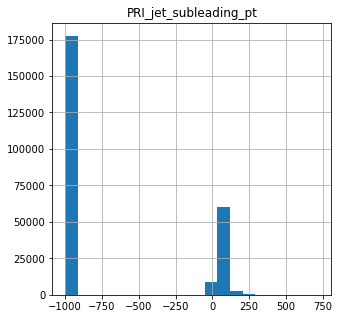

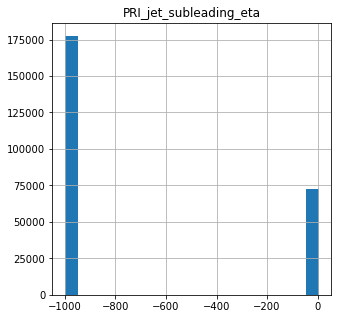

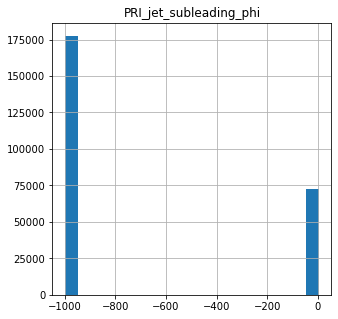

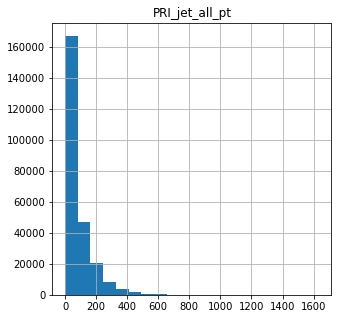

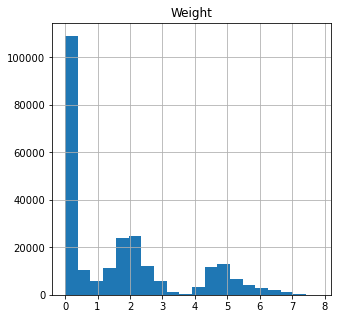

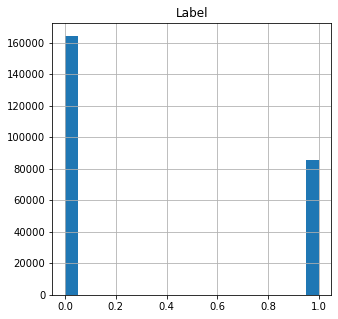

In [4]:
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5,5
for col in train.columns:
    train[[col]].hist(bins=20)


In [5]:
target = train['Label']
train_calc = train.drop(columns = ['Weight','Label','EventId'])
train_calc.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


# Классификатор Байесса

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

bnb = BernoulliNB()
bnb.fit(train_calc, target)
gprob_bnb = bnb.predict_proba(train_calc)
gpred_bnb = bnb.predict(train_calc)
acc_bnb = accuracy_score(target, gpred_bnb)

gnb = GaussianNB()
gnb.fit(train_calc, target)
gprob_gnb = gnb.predict_proba(train_calc)
gpred_gnb = gnb.predict(train_calc)
acc_gnb = accuracy_score(target, gpred_gnb)

print(acc_bnb)
print(acc_gnb)

0.625208
0.67652


# Комоновские деревья

In [8]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(2, 20, 2),
    'max_features' : np.arange(1, train_calc.shape[1], 1),
    #'max_features' : [None, 'auto', 'sqrt', 'log2'],
    'criterion' : ['gini','entropy']
}

clf_tree = DecisionTreeClassifier()

grid = GridSearchCV(
    clf_tree, params, scoring='roc_auc',n_jobs=-1,
    cv=5,
    refit=True
)

grid.fit(train_calc, target);
print(grid.best_params_,grid.best_score_)

KeyboardInterrupt: 

## mini

In [9]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

mini_train = train_calc[:1000]
mini_target = target[:1000]

params = {
    'max_depth': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(2, 20, 2),
    'max_features' : np.arange(1, mini_train.shape[1], 1),
    #'max_features' : [None, 'auto', 'sqrt', 'log2'],
    'criterion' : ['gini','entropy']
}

clf_tree = DecisionTreeClassifier()

grid = GridSearchCV(
    clf_tree, params, scoring='roc_auc',n_jobs=-1,
    cv=5,
    refit=True
)

grid.fit(mini_train, mini_target);
print(grid.best_params_,grid.best_score_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 27, 'min_samples_leaf': 18} 0.8342539046306057
Wall time: 1min 2s


# KNN

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
mini_train = train_calc[:1000]
mini_target = target[:1000]

params_knn = {
    'p': [1, 2],
    'n_neighbors' : np.arange(2, 20, 2),
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : np.arange(25, 55, 5)
}

clf_knn = KNeighborsClassifier()

grid_knn = GridSearchCV(
    clf_knn, params_knn, scoring='roc_auc',n_jobs=-1,
    cv=5,
    refit=True
)

grid_knn.fit(train_calc, target);
print(grid_knn.best_params_,grid_knn.best_score_)

## mini

In [8]:
%%time
from sklearn.neighbors import KNeighborsClassifier
mini_train = train_calc[:1000]
mini_target = target[:1000]

params_knn = {
    'n_neighbors' : np.arange(2, 20, 1),
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : np.arange(25, 55, 5),
    'p' : [1, 2]
}
clf_knn = KNeighborsClassifier()

grid_knn = GridSearchCV(
    clf_knn, params_knn, scoring='roc_auc',n_jobs=-1,
    cv=5,
    refit=True
)

grid_knn.fit(mini_train, mini_target);
print(grid_knn.best_params_,grid_knn.best_score_)

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 15, 'p': 1} 0.7800995454374146
Wall time: 6.66 s


# Логистическая регрессия

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression

params_lr = {
    'penalty' : ['l1', "l2", "elasticnet", "none"],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : np.arange(50, 1000, 50)
}

clf_lr = LogisticRegression()

grid_lr = GridSearchCV(
    clf_lr, params_lr, scoring='roc_auc',n_jobs=-1,
    cv=5,
    refit=True
)

grid_lr.fit(train_calc, target);
print(grid_lr.best_params_,grid_lr.best_score_)

## mini

In [11]:
%%time
from sklearn.linear_model import LogisticRegression

mini_train = train_calc[:1000]
mini_target = target[:1000]

params_lr = {
    'penalty' : ['l1', "l2", "elasticnet", "none"],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : np.arange(500, 10000, 500)
}

clf_lr = LogisticRegression()

grid_lr = GridSearchCV(
    clf_lr, params_lr, scoring='roc_auc',n_jobs=-1,
    cv=5,
    refit=True
)

grid_lr.fit(mini_train, mini_target);
print(grid_lr.best_params_,grid_lr.best_score_)

{'max_iter': 6000, 'penalty': 'none', 'solver': 'lbfgs'} 0.7837874169198431
Wall time: 2min 37s


# Случайные деревья

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

params_rf = {
    'n_estimators' : np.arange(50,500,10),
    'criterion' : ['gini','entropy'],
    'max_depth': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(2, 20, 2),
    'max_features' : np.arange(1, train_calc.shape[1], 1)
}

clf_rf = RandomForestClassifier(100)

grid_rf = GridSearchCV(
    clf_rf, params_rf, scoring='roc_auc',n_jobs=-1,
    cv=5,
    refit=True
)
grid_rf.fit(train_calc, target);
print(grid_rf.best_params_,grid_rf.best_score_)

## mini

In [15]:
%%time
from sklearn.ensemble import RandomForestClassifier

mini_train = train_calc[:1000]
mini_target = target[:1000]

params_rf = {
    'n_estimators' : np.arange(50,500,10),
    'criterion' : ['gini','entropy'],
    'max_depth': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(2, 20, 2),
    'max_features' : np.arange(1, mini_train.shape[1], 1)
}

clf_rf = RandomForestClassifier(100)

grid_rf = GridSearchCV(
    clf_rf, params_rf, scoring='roc_auc',n_jobs=-1,
    cv=5,
    refit=True
)
grid_rf.fit(mini_train, mini_target);
print(grid_rf.best_params_,grid_rf.best_score_)

KeyboardInterrupt: 

# Стэкинг

In [ ]:
%%time
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

minitrain = train_new[:1000]
minitarget = target[:1000]

clfs = [
    ('rf', RandomForestClassifier(criterion = 'entropy', max_depth = 17, min_samples_leaf = 3, n_estimators = 450)),
     ('knn', KNeighborsClassifier(algorithm = 'auto', leaf_size = 25, n_neighbors = 19, p = 1)),
     ('tree', DecisionTreeClassifier(criterion = 'gini', max_depth = 7, max_features = 25, min_samples_leaf = 23)),
     ('lr', LogisticRegression(max_iter = 9500, penalty = 'l1', solver = 'liblinear')),
 ]


stck = StackingClassifier(estimators = clfs, n_jobs = -1, cv = 5)

stck.fit(train_new, target)

acc = roc_auc_score(stck.predict(train_new), target)
print(acc)

# mini

In [9]:
%%time
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

mini_train = train_calc[:10000]
mini_target = target[:10000]

clfs = [
    ('rf', RandomForestClassifier(criterion = 'entropy', max_depth = 17, min_samples_leaf = 3, n_estimators = 450)),
     ('knn', KNeighborsClassifier(algorithm = 'auto', leaf_size = 25, n_neighbors = 19, p = 1)),
     ('tree', DecisionTreeClassifier(criterion = 'gini', max_depth = 7, max_features = 25, min_samples_leaf = 23)),
     ('lr', LogisticRegression(max_iter = 9500, penalty = 'l1', solver = 'liblinear')),
 ]


stck = StackingClassifier(estimators = clfs, n_jobs = -1, cv = 5)

stck.fit(mini_train, mini_target)

acc = roc_auc_score(stck.predict(mini_train), mini_target)
print(acc)

0.9586633404673947
Wall time: 8.85 s
